# 17IT005
Practical 2: Feature Selection/Elimination using Scikit-learn in Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('data.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

### Data Cleaning

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.loc[df['Gender'] == 'Male', 'Gender'] = 1
df.loc[df['Gender'] == 'Female', 'Gender'] = 0

In [ ]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [ ]:
df.loc[df['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
df.loc[df['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
df.loc[df['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

In [ ]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.loc[df['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
df.loc[df['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

In [ ]:
for col in df.columns:
    df[col] = df[col].astype(np.int32)
df.dtypes

id                      int32
Gender                  int32
Age                     int32
Driving_License         int32
Region_Code             int32
Previously_Insured      int32
Vehicle_Age             int32
Vehicle_Damage          int32
Annual_Premium          int32
Policy_Sales_Channel    int32
Vintage                 int32
Response                int32
dtype: object

### Spliting train and test data 

In [ ]:
x = df[['Gender', 'Age', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium','Policy_Sales_Channel', 'Vintage']]
y = df['Response']
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

### Before Feature Selection 

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
accuracy_score(Y_test,knn.predict(X_test))

0.8573771352103068

### Appling Univariate feature selection

In [ ]:
X_best= SelectKBest(chi2, k=5).fit(X_train, Y_train)
mask = X_best.get_support() #list of booleans for selected features
new_feat = []
for bool, feature in zip(mask, X_train.columns):
 if bool:
     new_feat.append(feature)

#### The best features are

In [ ]:
new_feat

['Age',
 'Previously_Insured',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel']

In [ ]:
x_train = X_train[new_feat]
x_test = X_test[new_feat]

In [ ]:
del knn
knn=KNeighborsClassifier()
knn.fit(x_train,Y_train)
accuracy_score(Y_test,knn.predict(x_test))

0.8581118312298287

### Appling Recursive feature elimination

In [ ]:
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select = 5)
selector = selector.fit(X_train, Y_train)
rfe_mask = selector.get_support() #list of booleans for selected features


#### The best features are

In [ ]:
new_feat = [] 
for bool, feature in zip(rfe_mask, X_train.columns):
 if bool:
     new_feat.append(feature)
new_feat # The list of your 5 best features

['Age', 'Region_Code', 'Vehicle_Damage', 'Annual_Premium', 'Vintage']

In [ ]:
del x_train
del x_test
x_train = X_train[new_feat]
x_test = X_test[new_feat]

In [ ]:
del knn
knn=KNeighborsClassifier()
knn.fit(x_train,Y_train)
accuracy_score(Y_test,knn.predict(x_test))

0.8598173755608617

### Appling PCA (Principal Component Analysis)

In [ ]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [ ]:
del x_train
del x_test
x_train = pca.transform(X_train)
x_test = pca.transform(X_test)

In [ ]:
del knn
knn=KNeighborsClassifier()
knn.fit(x_train,Y_train)
accuracy_score(Y_test,knn.predict(x_test))

0.8635958122326888

### Using Correlation


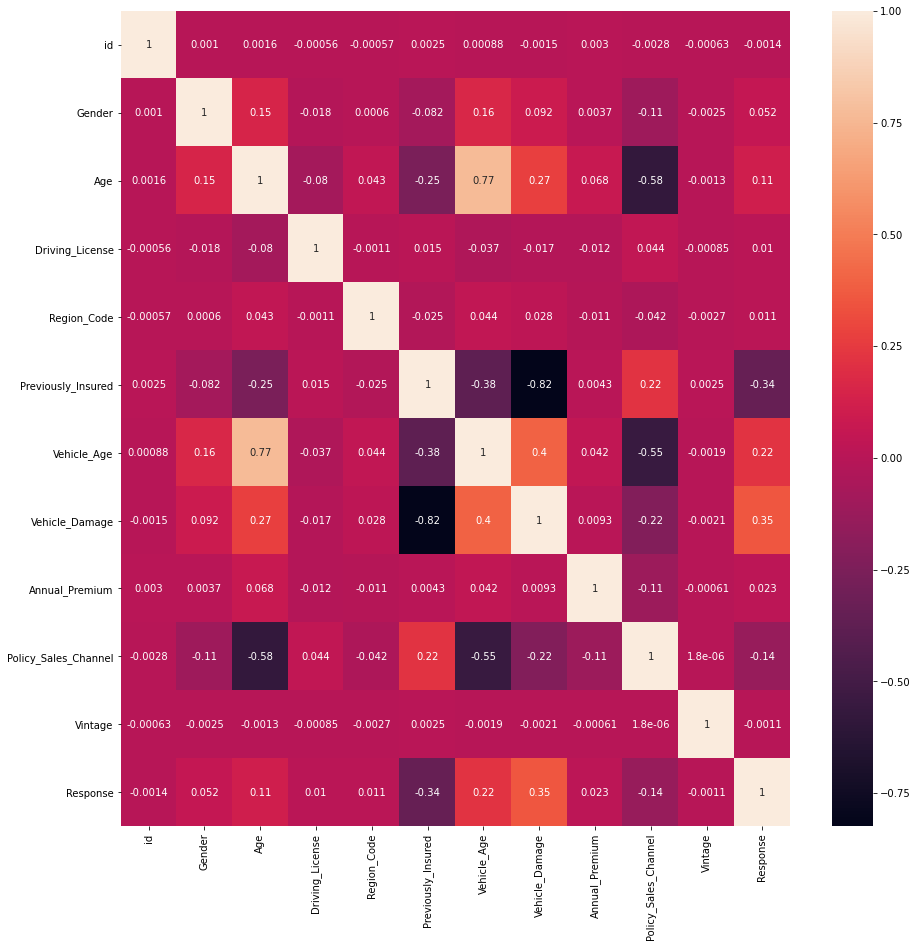

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
abs(corr['Response']).sort_values(ascending = False)

Response                1.000000
Vehicle_Damage          0.354400
Previously_Insured      0.341170
Vehicle_Age             0.221874
Policy_Sales_Channel    0.139042
Age                     0.111147
Gender                  0.052440
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
id                      0.001368
Vintage                 0.001050
Name: Response, dtype: float64

#### Selecting top 5 feature

In [ ]:
x_train = X_train[['Vehicle_Damage','Previously_Insured','Vehicle_Age','Policy_Sales_Channel','Age']]
x_test = X_test[['Vehicle_Damage','Previously_Insured','Vehicle_Age','Policy_Sales_Channel','Age']]

In [ ]:
del knn
knn=KNeighborsClassifier()
knn.fit(x_train,Y_train)
accuracy_score(Y_test,knn.predict(x_test))

0.8519456324945553